In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_dodge_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_void_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_sheep_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set d

In [36]:
"""Voice-based emotion recognition involves analyzing speech signals to identify the underlying emotional states of the speaker. There are several types of plots that can be used to visualize and understand the emotional characteristics of speech data. Here are some common plots used in voice-based emotion recognition:

Waveform Plot: The waveform plot represents the amplitude of the audio signal over time. It provides a basic visualization of the raw audio and how it varies with time. Emotion-related features such as pitch, loudness, and speaking rate can be observed from the waveform plot.

Spectrogram: A spectrogram is a 2D representation of the frequency content of an audio signal over time. It shows how the frequency components change as the audio progresses. Spectrograms can reveal information about the formants (vocal tract resonances) and pitch variations in speech, which can be related to emotional expressions.

Mel-Frequency Cepstral Coefficients (MFCC) Plot: MFCCs are widely used features in speech processing. The MFCC plot visualizes the coefficients extracted from the audio signal, representing the power spectrum of the sound. MFCCs are commonly used for emotion recognition due to their effectiveness in capturing speech characteristics.

Pitch Contour Plot: The pitch contour plot shows the pitch of the speech signal over time. This plot helps in visualizing variations in pitch, which can be indicative of emotional changes or expressive speech patterns.

Emotion Class Distribution Plot: This plot shows the distribution of different emotion classes in the dataset. It helps to understand the class imbalance and may prompt the need for data balancing techniques.

Feature Scatter Plot: If you have extracted multiple features (e.g., MFCCs, pitch, energy) from the audio, you can create scatter plots to visualize the distribution of these features for different emotions. This allows you to see how well the features separate emotions.

Confusion Matrix: In the context of emotion classification, a confusion matrix shows the number of true positives, true negatives, false positives, and false negatives. It helps evaluate the performance of the emotion classifier by showing which emotions are frequently misclassified."""

'Voice-based emotion recognition involves analyzing speech signals to identify the underlying emotional states of the speaker. There are several types of plots that can be used to visualize and understand the emotional characteristics of speech data. Here are some common plots used in voice-based emotion recognition:\n\nWaveform Plot: The waveform plot represents the amplitude of the audio signal over time. It provides a basic visualization of the raw audio and how it varies with time. Emotion-related features such as pitch, loudness, and speaking rate can be observed from the waveform plot.\n\nSpectrogram: A spectrogram is a 2D representation of the frequency content of an audio signal over time. It shows how the frequency components change as the audio progresses. Spectrograms can reveal information about the formants (vocal tract resonances) and pitch variations in speech, which can be related to emotional expressions.\n\nMel-Frequency Cepstral Coefficients (MFCC) Plot: MFCCs are wi

In [2]:
import pandas as pd
import numpy as np
import os  
import seaborn as sns
import matplotlib.pyplot as plt 
import librosa #package used for video,audio analysis
import librosa.display 
from IPython.display import Audio 
import IPython.display as ipd
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
base_path = "/kaggle/input/toronto-emotional-speech-set-tess"

paths = []
labels = []
for dirname, _, filenames in os.walk(base_path):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Successfully Loaded!')

Dataset is Successfully Loaded!


In [4]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [5]:
df['label'].value_counts()

fear       400
angry      400
disgust    400
neutral    400
sad        400
ps         400
happy      400
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

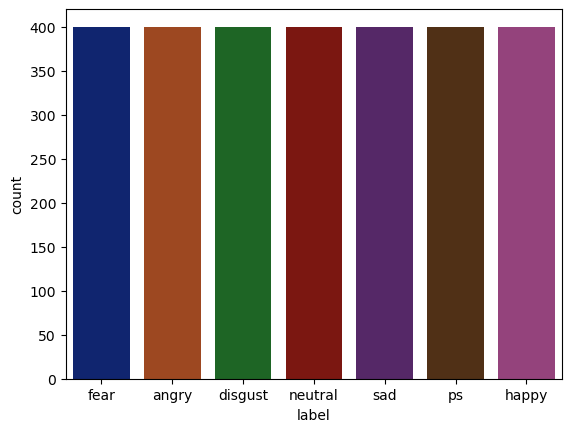

In [6]:
sns.countplot(x = df['label'], data=df, palette='dark')

In [7]:
data, sampling_rate = librosa.load('/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_happy/OAF_back_happy.wav')
ipd.Audio('/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_happy/OAF_back_happy.wav')

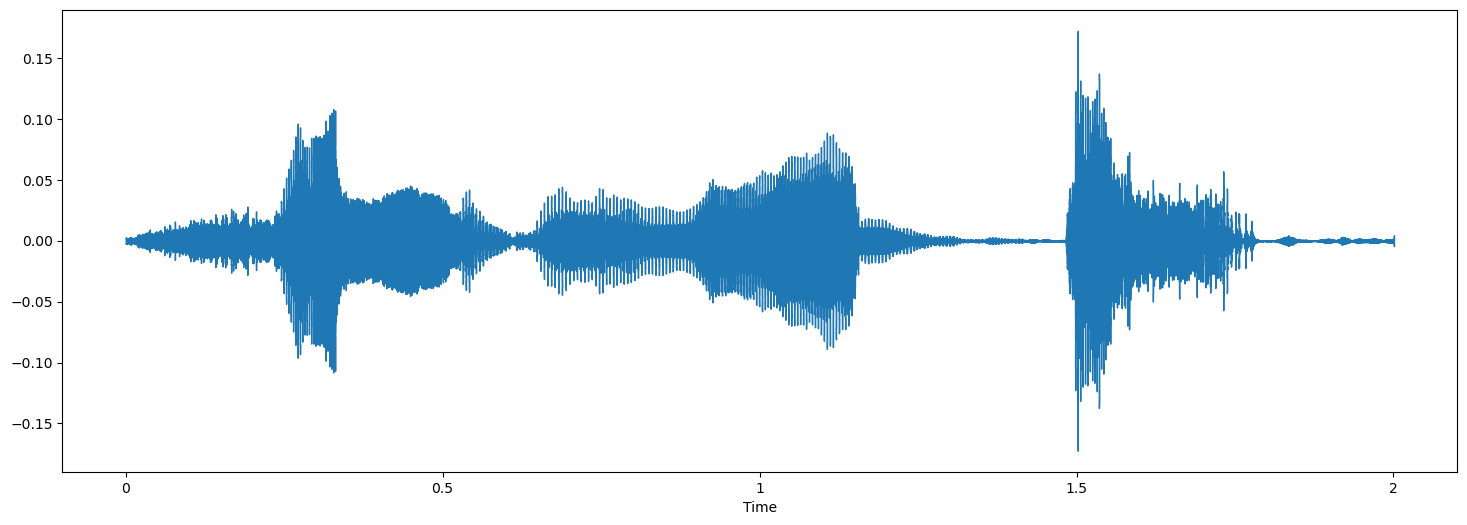

In [8]:
plt.figure(figsize=(18, 6))
librosa.display.waveshow(data, sr=sampling_rate)

In [9]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    x_db = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(x_db, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

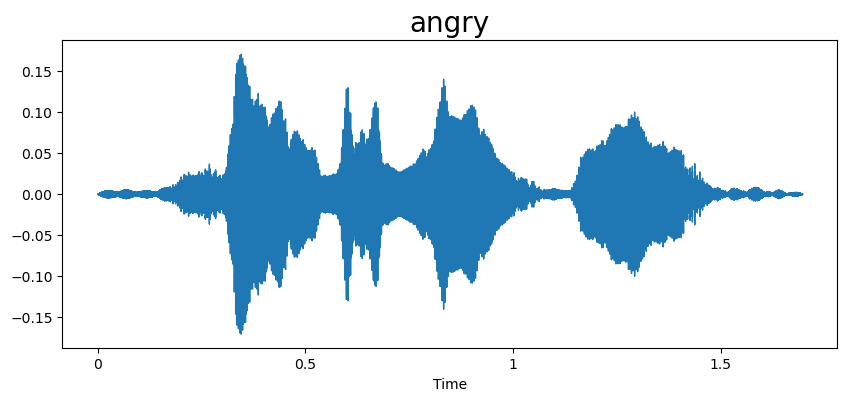

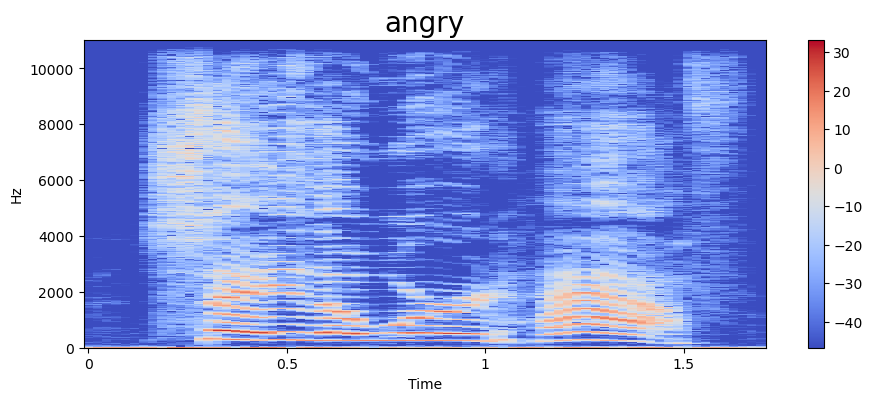

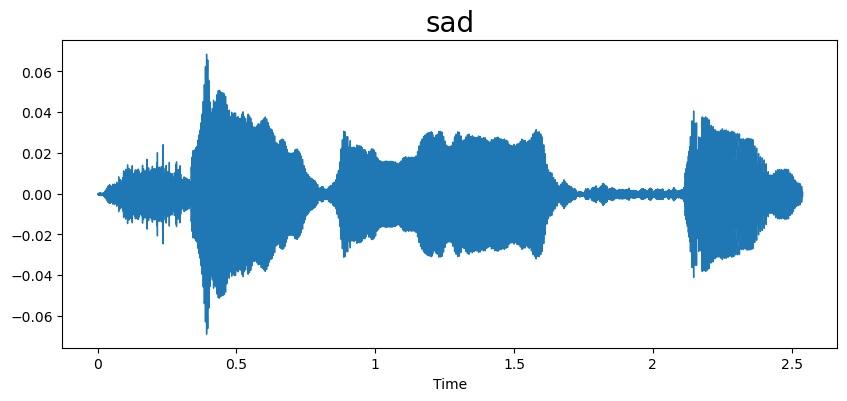

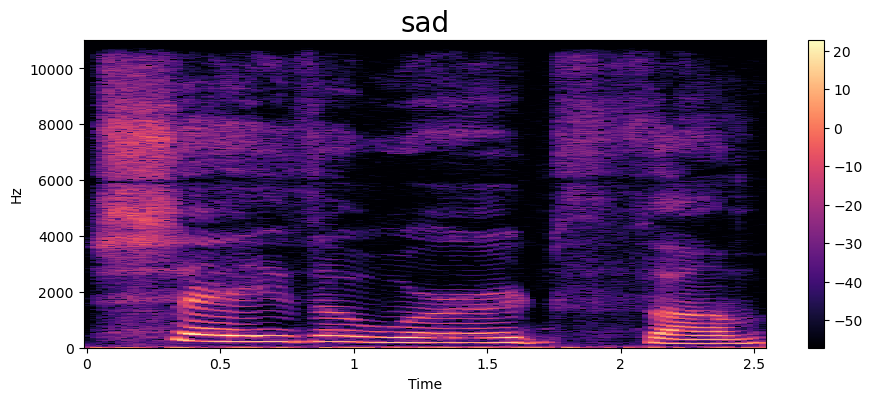

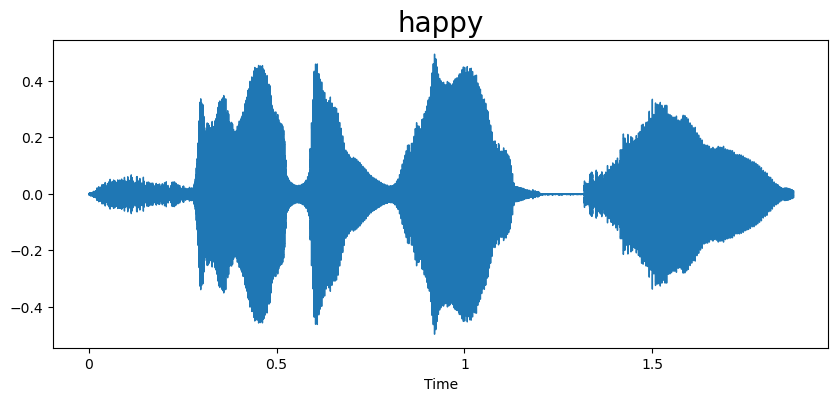

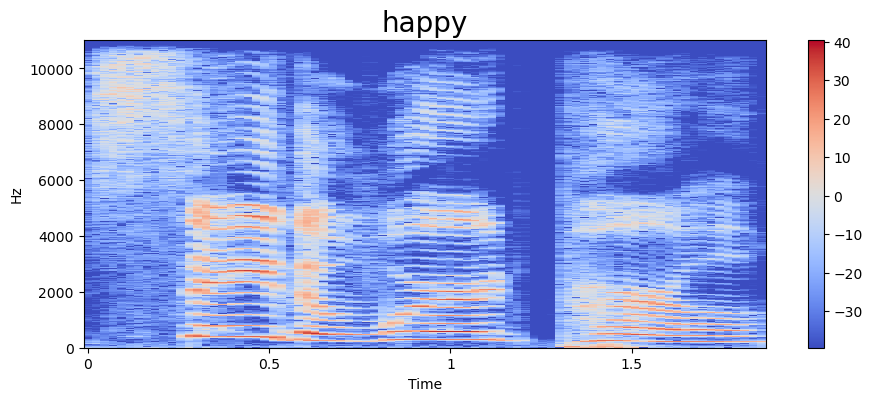

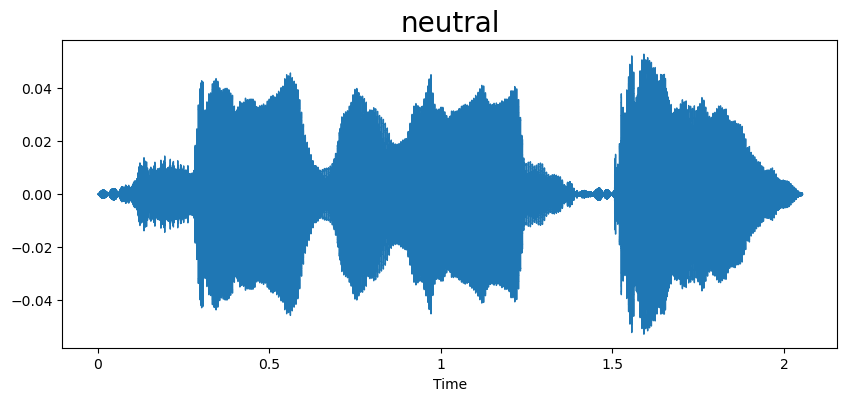

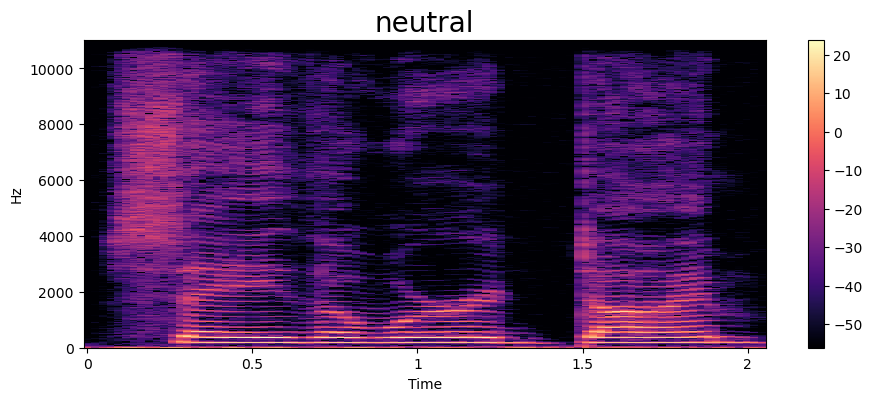

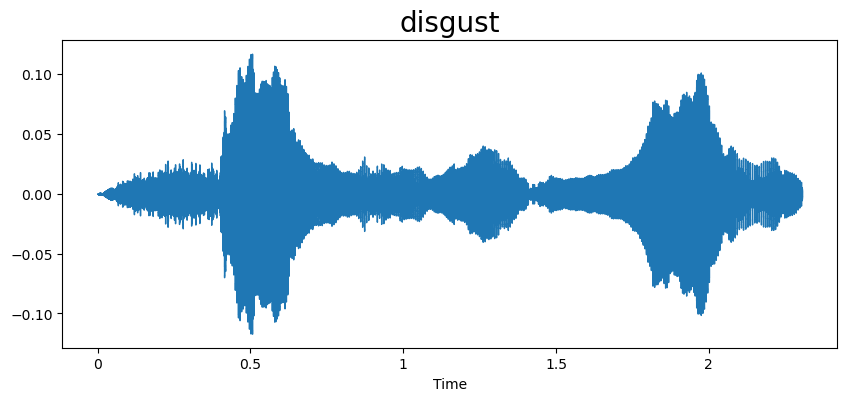

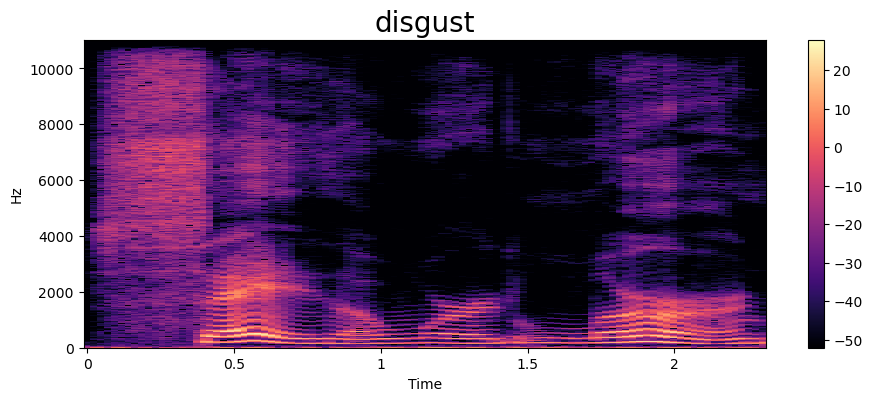

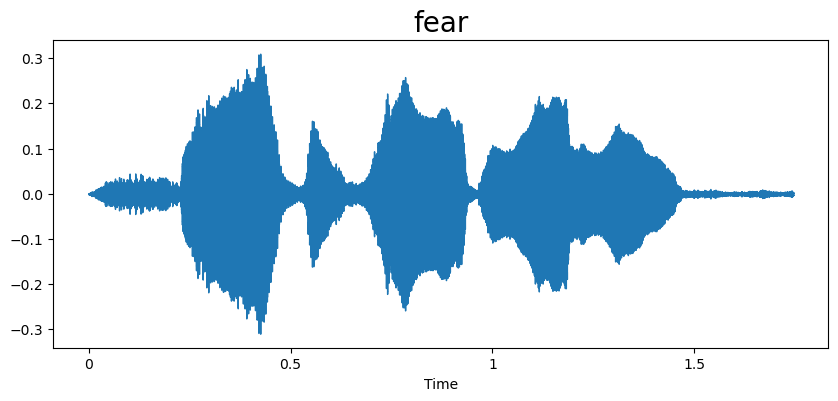

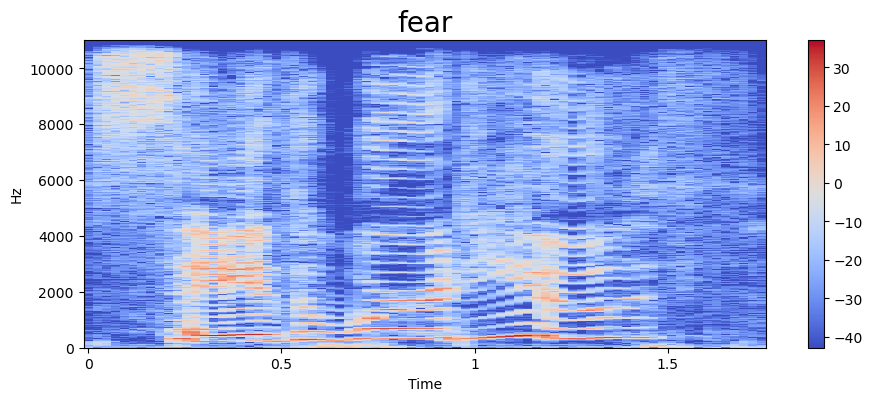

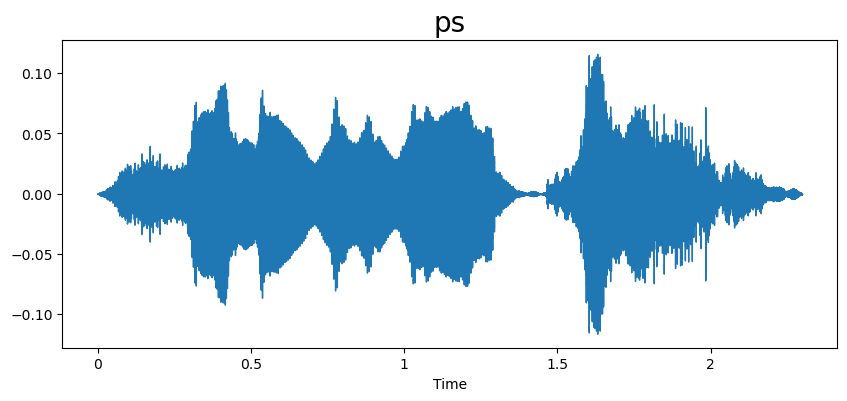

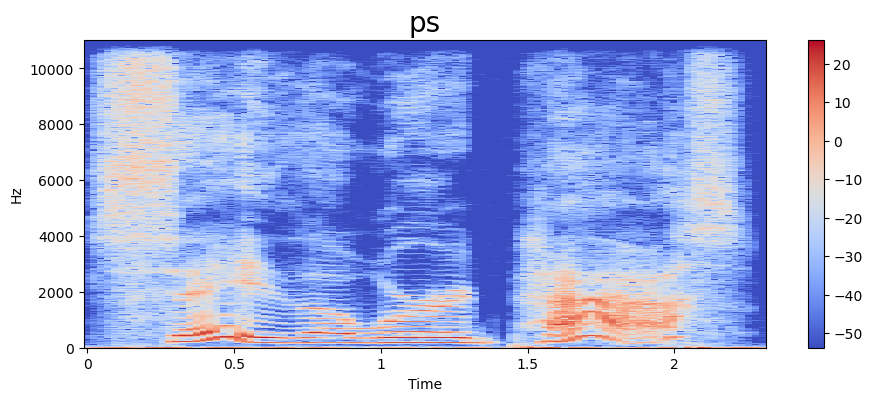

In [10]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [11]:
def compute_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    average_mfccs = np.mean(mfccs.T, axis=0)
    return average_mfccs
compute_mfcc(df['speech'][0])







array([-285.73727   ,   85.78295   ,   -2.1689112 ,   22.125532  ,
        -14.757395  ,   11.051346  ,   12.412449  ,   -3.0002618 ,
          1.0844991 ,   11.078272  ,  -17.41966   ,   -8.093213  ,
          6.5879726 ,   -4.2209535 ,   -9.15508   ,    3.52148   ,
        -13.186381  ,   14.078853  ,   19.66973   ,   22.725618  ,
         32.57464   ,   16.325035  ,   -3.8427293 ,    0.89629656,
        -11.239262  ,    6.653462  ,   -2.5883696 ,   -7.7140164 ,
        -10.941658  ,   -2.4007547 ,   -5.281288  ,    4.271157  ,
        -11.202216  ,   -9.024621  ,   -3.6669848 ,    4.869744  ,
         -1.6027985 ,    2.5600514 ,   11.454374  ,   11.233449  ],
      dtype=float32)

In [12]:
MFCC = df['speech'].apply(lambda x: compute_mfcc(x))
MFCC

0       [-285.73727, 85.78295, -2.1689112, 22.125532, ...
1       [-348.34332, 35.193233, -3.841328, 14.658875, ...
2       [-340.11435, 53.796444, -14.267782, 20.884027,...
3       [-306.63422, 21.259708, -4.4110823, 6.4871554,...
4       [-344.7548, 46.329193, -24.171413, 19.392921, ...
                              ...                        
2795    [-374.3952, 60.864998, 0.025059083, 8.431058, ...
2796    [-313.96478, 39.847843, -5.6493053, -3.867575,...
2797    [-357.54886, 77.886055, -15.224756, 2.194633, ...
2798    [-353.1474, 101.68391, -14.175896, -12.037376,...
2799    [-389.4595, 54.042767, 1.346998, -1.4258983, -...
Name: speech, Length: 2800, dtype: object

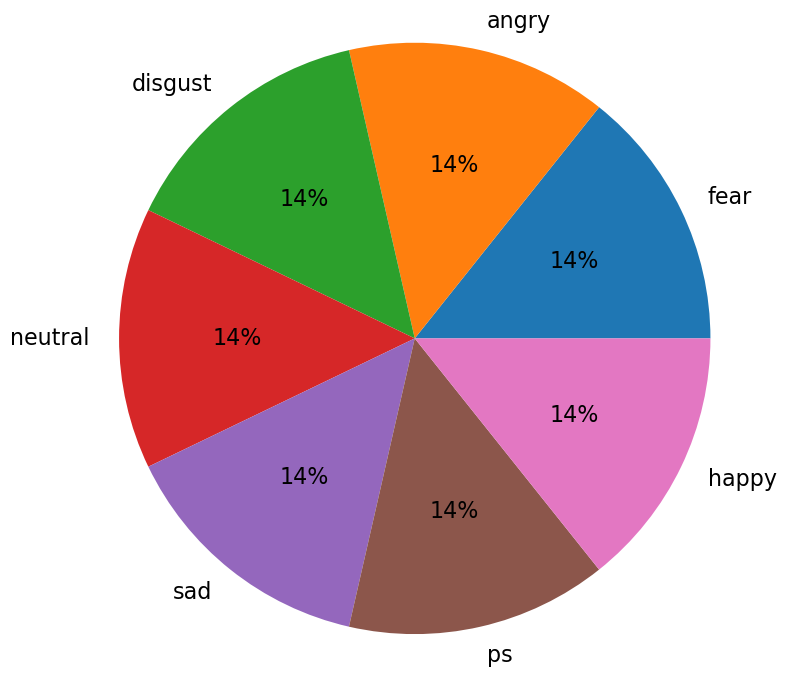

In [13]:
labels = ["fear", "angry", "disgust", "neutral", "sad","ps", "happy"]
plt.pie(df['label'].value_counts(), labels = labels, autopct = '%.0f%%', radius= 2, textprops={'fontsize': 16})
plt.show()

In [14]:
def compute_average_pitch(filename):
    audio_signal, sampling_rate = librosa.load(filename, sr=None)
    harmonic, percussive = librosa.effects.hpss(audio_signal)
    pitch, magnitudes = librosa.piptrack(y=harmonic, sr=sampling_rate)
    pitch_values = pitch[np.argmax(magnitudes, axis=0)]
    average_pitch = np.mean(pitch_values)

    return average_pitch
compute_average_pitch(df['speech'][0])

44.073532

In [15]:
AP = df['speech'].apply(lambda x: compute_average_pitch(x))
AP

0        44.073532
1        27.691896
2        59.552090
3       166.048370
4       111.980843
           ...    
2795     94.039986
2796    102.045959
2797     74.752449
2798     37.243698
2799     61.028465
Name: speech, Length: 2800, dtype: float32

In [16]:
X=[x for x in MFCC]
X=np.array(X)
X.shape

(2800, 40)

In [17]:
X=np.expand_dims(X,-1)
X.shape

(2800, 40, 1)

In [18]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y = encoder.fit_transform(df[['label']])
y= y.toarray()

In [19]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y, test_size= 0.20, random_state =30)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [21]:
history = model.fit(x_train,y_train, validation_split=0.2, epochs=40, batch_size=64)

Epoch 1/40
28/28 [==============================] - 6s 140ms/step - loss: 1.3556 - accuracy: 0.4682 - val_loss: 0.7878 - val_accuracy: 0.6830
Epoch 2/40
28/28 [==============================] - 3s 118ms/step - loss: 0.6057 - accuracy: 0.7634 - val_loss: 0.4083 - val_accuracy: 0.8594
Epoch 3/40
28/28 [==============================] - 3s 124ms/step - loss: 0.2892 - accuracy: 0.9057 - val_loss: 0.2340 - val_accuracy: 0.9152
Epoch 4/40
28/28 [==============================] - 3s 115ms/step - loss: 0.2961 - accuracy: 0.9085 - val_loss: 0.2731 - val_accuracy: 0.9085
Epoch 5/40
28/28 [==============================] - 3s 117ms/step - loss: 0.1835 - accuracy: 0.9459 - val_loss: 0.1383 - val_accuracy: 0.9464
Epoch 6/40
28/28 [==============================] - 3s 116ms/step - loss: 0.1574 - accuracy: 0.9526 - val_loss: 0.1942 - val_accuracy: 0.9375
Epoch 7/40
28/28 [==============================] - 3s 114ms/step - loss: 0.1351 - accuracy: 0.9576 - val_loss: 0.0991 - val_accuracy: 0.9598
Epoch 

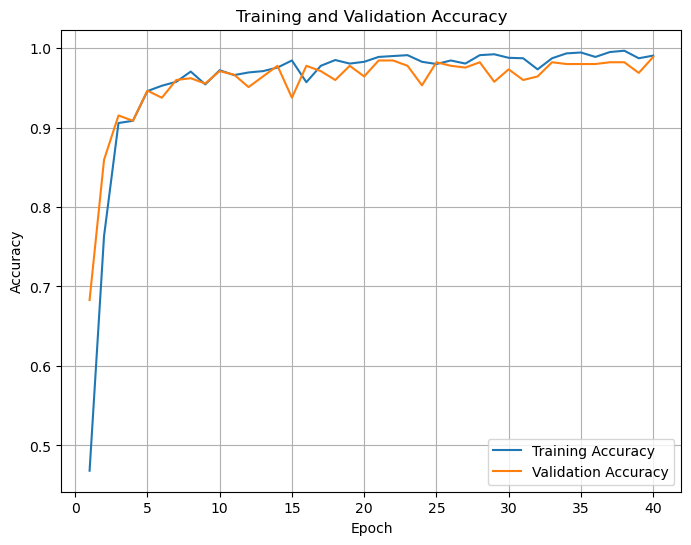

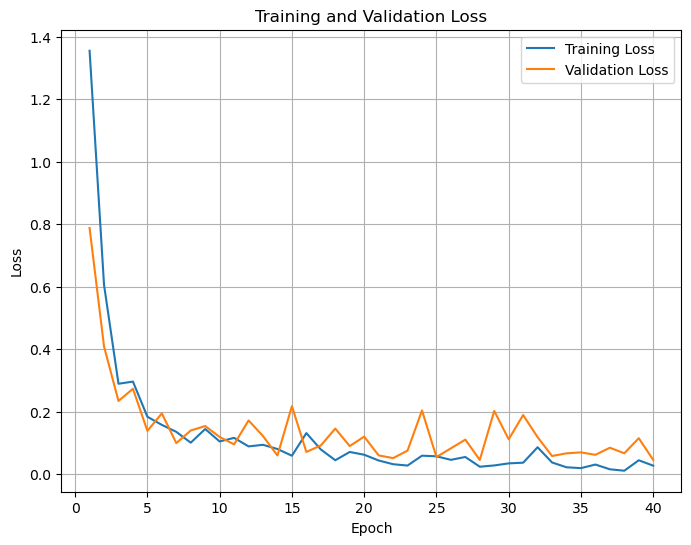

In [23]:
import matplotlib.pyplot as plt


train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
model.evaluate(x_train , y_train)

70/70 [==============================] - 3s 34ms/step - loss: 0.0149 - accuracy: 0.9955


[0.014853274449706078, 0.9955357313156128]

In [25]:
y_pred = model.predict(x_test, batch_size=5)

112/112 [==============================] - 2s 11ms/step


In [26]:
accuracy_score=model.evaluate(x_test , y_test)
print ("Model evaluation accuracy: ", round(accuracy_score[1]*100),"%")

18/18 [==============================] - 1s 32ms/step - loss: 0.0489 - accuracy: 0.9893
Model evaluation accuracy:  99 %


In [27]:
save_dir = "Speech Emotion Recognition Project"
os.makedirs(save_dir, exist_ok=True)

model_file = os.path.join(save_dir, "emotion_speech_recognition_model.h5")

model.save(model_file)

In [28]:
model_name = 'emotion_speech_recognition_model_lstm.h5'
save_dir = os.path.join(os.getcwd(), 'train_model')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved the trained model at %s ' % model_path)

Saved the trained model at /kaggle/working/train_model/emotion_speech_recognition_model_lstm.h5 


In [29]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [30]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("/kaggle/working/train_model/emotion_speech_recognition_model_lstm.h5")
print("Loaded model from disk")

loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 98.93%


In [31]:
pred = loaded_model.predict(x_test, batch_size=32, verbose=1)
pred

18/18 [==============================] - 1s 30ms/step


array([[5.9367598e-05, 5.9373375e-05, 1.4891124e-07, ..., 6.3551551e-07,
        9.9977303e-01, 4.1498890e-07],
       [9.9997288e-01, 1.6799491e-05, 2.2692529e-06, ..., 3.2273743e-07,
        2.2583054e-06, 3.3951228e-06],
       [1.8863679e-05, 7.1691538e-05, 2.6114751e-05, ..., 2.5378638e-06,
        1.7557538e-04, 9.8392542e-05],
       ...,
       [3.2761744e-08, 5.8606883e-08, 1.2342258e-08, ..., 9.9999875e-01,
        1.0923807e-06, 5.9145426e-09],
       [1.2671059e-06, 9.6019794e-05, 1.1361319e-06, ..., 1.4416153e-07,
        3.7619375e-06, 9.9989253e-01],
       [6.5935396e-06, 1.8801886e-03, 7.4900008e-06, ..., 7.4468035e-06,
        4.9178070e-05, 9.9800521e-01]], dtype=float32)

In [32]:
_pred=pred.argmax(axis=1)
_pred

array([5, 0, 3, 6, 3, 2, 0, 5, 2, 4, 0, 5, 1, 3, 6, 0, 5, 3, 5, 0, 3, 6,
       3, 6, 4, 2, 6, 6, 5, 2, 1, 5, 2, 6, 1, 5, 1, 6, 4, 5, 3, 2, 3, 6,
       3, 5, 2, 4, 5, 1, 4, 4, 0, 2, 0, 6, 5, 4, 2, 2, 4, 5, 6, 0, 0, 4,
       1, 5, 5, 3, 2, 4, 2, 6, 6, 5, 2, 5, 3, 6, 5, 2, 6, 0, 6, 4, 5, 3,
       4, 4, 3, 2, 0, 5, 2, 4, 2, 1, 3, 6, 2, 5, 1, 2, 6, 2, 4, 4, 6, 5,
       1, 2, 0, 4, 4, 4, 5, 3, 0, 5, 1, 4, 0, 6, 4, 2, 6, 3, 1, 3, 5, 6,
       6, 0, 2, 0, 6, 5, 3, 6, 0, 1, 0, 3, 4, 0, 6, 6, 5, 1, 2, 2, 1, 4,
       2, 5, 2, 3, 6, 1, 0, 1, 4, 3, 0, 6, 5, 5, 6, 0, 6, 5, 1, 4, 4, 2,
       3, 6, 4, 2, 5, 3, 2, 0, 3, 5, 4, 6, 3, 1, 4, 6, 3, 4, 4, 0, 0, 5,
       0, 0, 5, 3, 3, 0, 1, 4, 2, 5, 1, 4, 5, 2, 2, 3, 4, 5, 3, 6, 2, 0,
       3, 5, 6, 2, 1, 4, 3, 1, 6, 2, 5, 3, 6, 0, 0, 0, 0, 3, 6, 5, 5, 0,
       2, 2, 1, 5, 4, 2, 4, 0, 6, 3, 1, 1, 1, 6, 2, 3, 5, 3, 1, 5, 0, 5,
       0, 3, 6, 3, 6, 4, 3, 4, 3, 3, 1, 6, 6, 1, 4, 6, 2, 5, 4, 1, 1, 5,
       4, 0, 4, 6, 1, 0, 3, 3, 0, 2, 5, 5, 4, 1, 6,

In [33]:
z = _pred.astype(int).flatten()
prediction = (encoder.inverse_transform(z.reshape(-1, 7)))
pred_data = pd.DataFrame({'Predicted Values': prediction.flatten()})
pred_data[:10]
actual=y_test.argmax(axis=1)
yz = actual.astype(int).flatten()
actual_values = (encoder.inverse_transform((yz.reshape(-1, 7))))
actual_data = pd.DataFrame({'actual values': actual_values.flatten()})
actual_data[:10]
final_data = actual_data.join(pred_data)
final_data[:15]

,actual values,Predicted Values
0,happy,happy
1,angry,angry
2,angry,angry
3,angry,angry
4,ps,ps
5,fear,fear
6,disgust,disgust
7,sad,sad
8,sad,sad
9,neutral,neutral


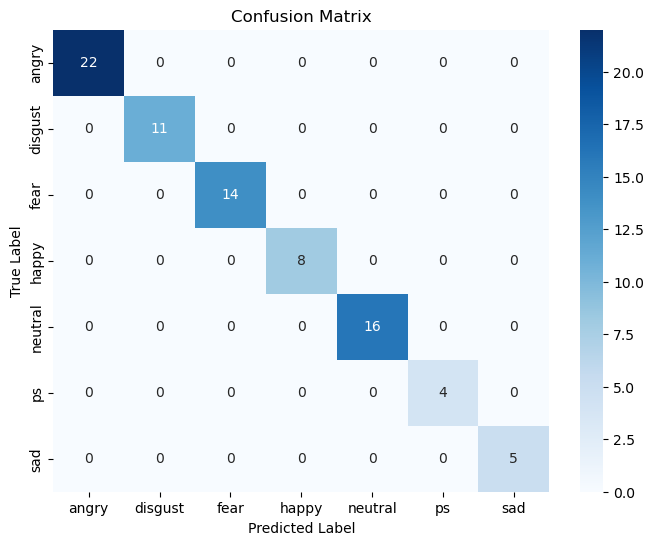

In [34]:
from sklearn.metrics import confusion_matrix
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']

cm = confusion_matrix(actual_data, pred_data)

cm_df = pd.DataFrame(cm, index=emotions, columns=emotions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [35]:
final_data.to_csv('prediction-emotion-label.csv', index=False)